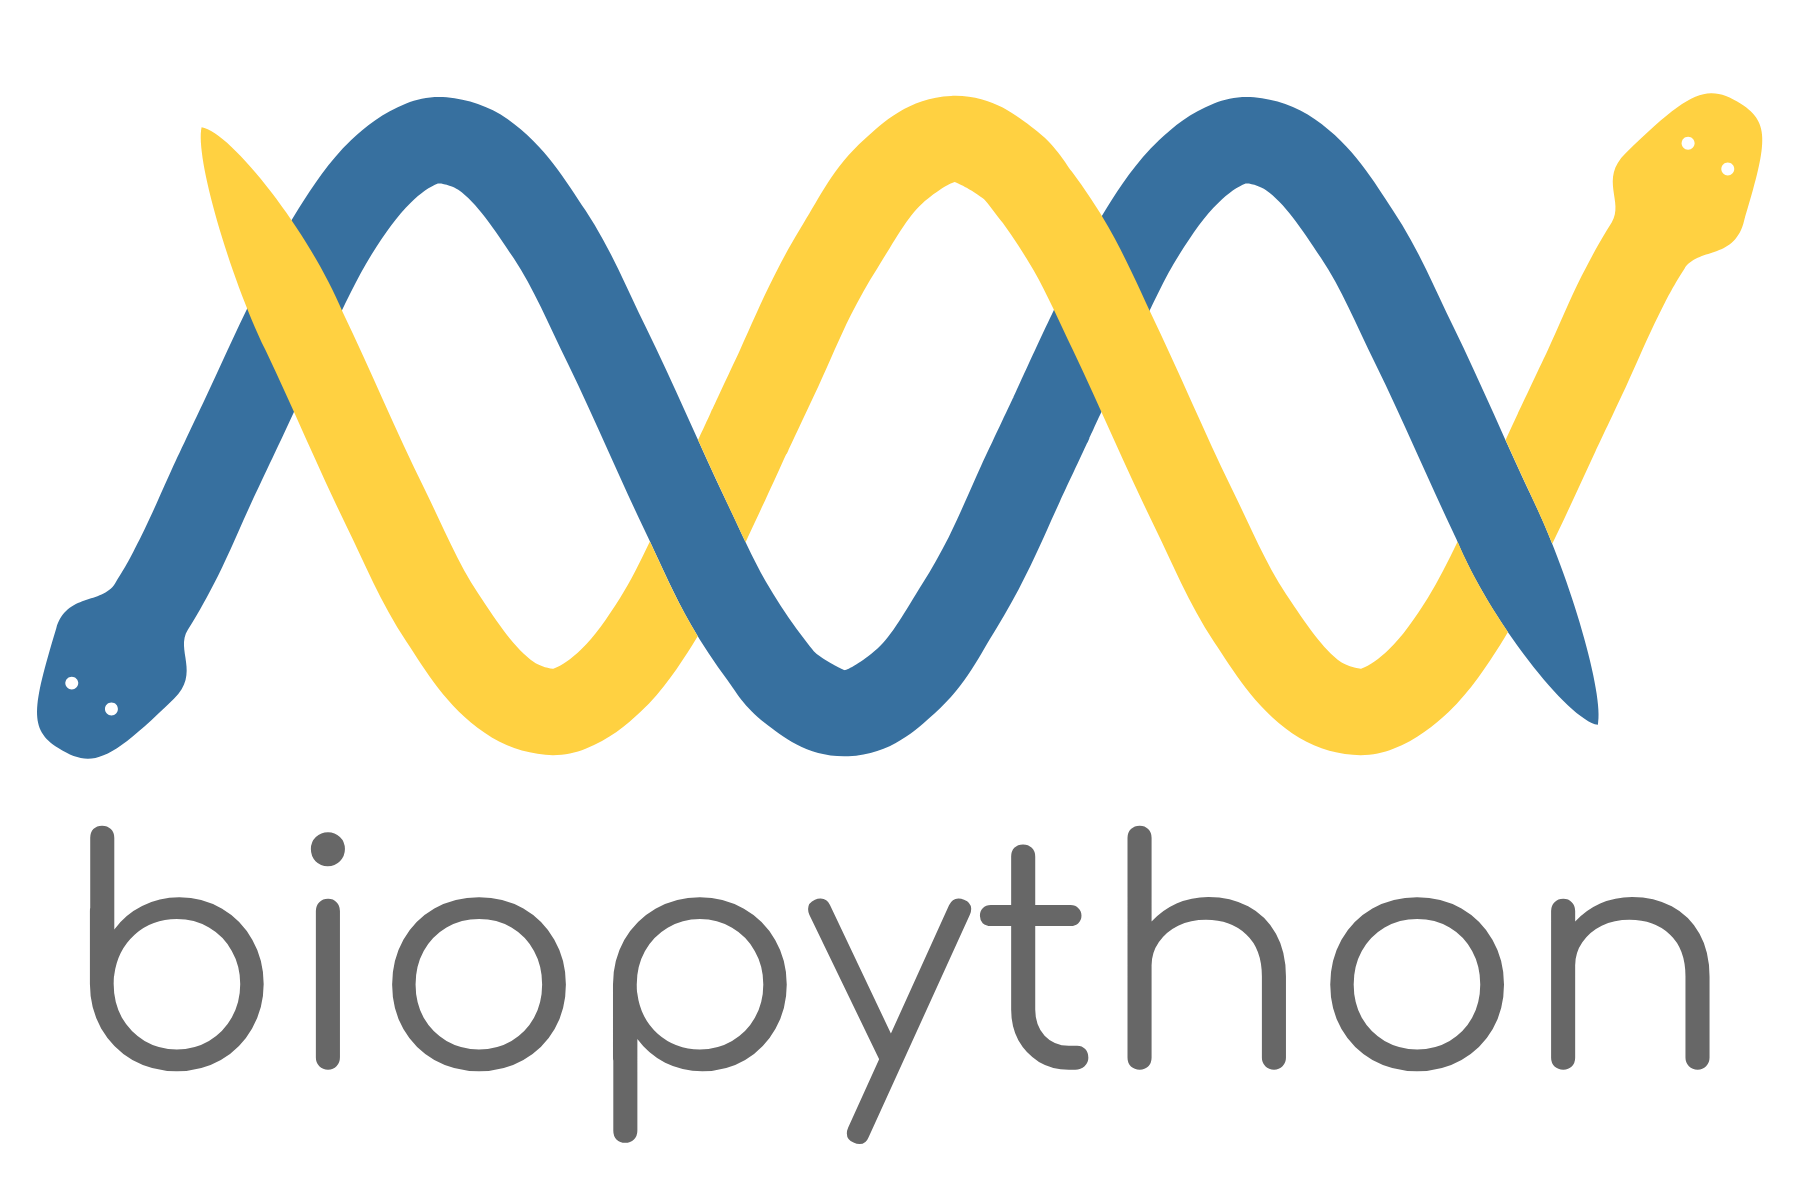

# Introduction

This Interactive Python notebook is intended for the example usage of BioPython. It is based and examples are extracted from the original source [here](https://biopython.org/docs/dev/Tutorial/index.html).

## What is Biopython?
Biopython is a collection of freely available Python (https://www.python.org) modules for computational molecular biology. Since its inception in 2000, Biopython has been continuously developed and maintained by a large group of volunteers worldwide.

The Biopython web site (http://www.biopython.org) provides an online resource for modules, scripts, and web links for developers of Python-based software for bioinformatics use and research. Biopython includes parsers for various bioinformatics file formats (BLAST, Clustalw, FASTA, Genbank, …), access to online services (NCBI, Expasy, …), a standard sequence class, sequence alignment and motif analysis tools, clustering algorithms, a module for structural biology, and a module for phylogenetics analysis.

## What can I find in the Biopython package?

The main Biopython releases have lots of functionality, including:

- The ability to parse bioinformatics files into Python utilizable data structures, including support for the following formats:

    - Blast output – both from standalone and WWW Blast

    - Sequence formats: Clustalw; FASTA; GenBank

    - PubMed and Medline

    - ExPASy files, like Enzyme and Prosite

    - SCOP, including ‘dom’ and ‘lin’ files

- Files in the supported formats can be iterated over record by record or indexed and accessed via a Dictionary interface.

- Code to deal with popular on-line bioinformatics destinations such as:

    - NCBI – Blast, Entrez and PubMed services

    - ExPASy – Swiss-Prot and Prosite entries, as well as Prosite searches

- Interfaces to common bioinformatics programs such as: BLAST, CLUSTALW and EMBOSS command line tools

- A standard sequence class that deals with sequences, ids on sequences, and sequence features. Alonging to easily:

    - Perform common operations on sequences, such as translation, transcription and weight calculations.
    - Deal with alignments, including a standard way to create and deal with substitution matrices.


- Extensive documentation and help with using the modules, including this file, on-line wiki documentation, the web site, and the mailing list.


# Biopython Quickstart

See details and an example on how to get started with BioPython:
https://biopython.org/docs/dev/Tutorial/chapter_quick_start.html

### Example usage of the Seq Class

See additional details in https://biopython.org/docs/dev/api/Bio.Seq.html

As an example, let's save into a file within the same directory where this interactive python notebook is, an example fasta sequence or execute the following code to save it using python:

In [ ]:
seq_header = ">gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA"
seq_dna = "CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGG"

In [ ]:
# save in a file named test.fasta the seq_header and seq_dna strings
with open("test.fasta", "w") as text_file:
    text_file.write(seq_header + "\n")
    text_file.write(seq_dna)    

In [ ]:
# loads SeqIO module from the BioPython package
from Bio import SeqIO
from Bio import Seq

# creates a seq_record object for each fasta within the test.fasta file
for seq_record in SeqIO.parse("test.fasta", "fasta"):
    ## seq_record.id contains the ID of the sequence
    print(seq_record)
    print(type(seq_record))

In [ ]:
    print(seq_record.id)

In [ ]:
    # seq_record.seq contains the sequence
    print(repr(seq_record.seq))

    # we can calculate the length or other statistics
    print(len(seq_record))
    print("\n")

In [ ]:
    # we can slice the sequence
    print("## Slicing the sequence: as an object")
    print("# seq_record[10:15]")
    print(seq_record[10:15])
    print("\n")

In [ ]:
    # we can convert to string
    print("## Slicing the sequence as string")
    print("# str(seq_record.seq)[10:15]")
    print(str(seq_record.seq)[10:15])
    print("\n")

In [ ]:
    # we can transcribe the sequence
    print("## Transcribing the sequence to RNA ")
    print("# Seq.transcribe(seq_record.seq)")
    print(Seq.transcribe(seq_record.seq))

In [ ]:
    # we can translate the sequence
    print("## Translating the sequence to protein ")
    print("# Seq.translate(seq_record.seq)")
    print(Seq.translate(seq_record.seq))

    # Options:
    #translate(coding_dna, stop_symbol="@")
    #translate(coding_dna, to_stop=True)

### Example of Genbank retrieval

In [ ]:
genbank_acc='NC_045512.2'
print(genbank_acc)

from Bio import SeqIO
from Bio import Entrez
Entrez.email = 'JoseFrancisco.Sanchez@uab.cat'

handle = Entrez.efetch(db='nucleotide', id=genbank_acc, rettype='gb', retmode='text')
GBseq = SeqIO.read(handle,'genbank')
handle.close()

## Show items stored in GBseq
print('Description:', GBseq.description)
print('Division:', GBseq.annotations['data_file_division'])
print('Species:', GBseq.annotations['source'])
print('Molecule:', GBseq.annotations['molecule_type'])
print('Sequence:', GBseq.seq[1:100], "...")
print('Length:',len(GBseq))

In [ ]:
# Now we might want to save the results or do anything else

### Example of genbank search

In [ ]:
#Descarreguem seqüències de GenBank amb el paquet Entrez
from Bio import Entrez

# Always tell NCBI who you are
Entrez.email = 'JoseFrancisco.Sanchez@uab.cat'

#Connectem a GenBank:
handle = Entrez.esearch(db="nucleotide", term="Arabidopsis[ORGN] AND topoisomerase[TITL]")

#Guardem els resultats (format XML)
results = Entrez.read(handle)

#Tanquem la connexió amb GenBank
handle.close()

In [ ]:
print(results)

In [ ]:
## this is a library to pretty print dictionaries
## https://docs.python.org/3/library/pprint.html
import pprint
pprint.pprint(results)

In [ ]:
for i in results["IdList"]:
    print(i)